In [42]:
import os 
import pandas as pd
rows = []
spanish_speeches=os.listdir("./spanish_speeches")
for speech_doc in spanish_speeches:
    year = int(speech_doc.split(".")[0])
    with open(f"./spanish_speeches/{speech_doc}", "r") as f:
        speech = f.read()
        rows.append([year, speech])
        f.close()
    
df = pd.DataFrame(rows, columns=["year", "speech"])    
df

,year,speech
0,2002,Me dirijo a todos los españoles para transmiti...
1,2016,Buenas noches.\n\nEn estas horas de la Navidad...
2,2017,"Buenas noches,\nMe dirijo a todos vosotros par..."
3,2003,"Como todos los años, me acerco a vuestros hoga..."
4,1939,\nEspañoles:\n\nLa guerra de liberación ha pla...
...,...,...
74,2021,"Buenas noches,\n\nMis primeras palabras en est..."
75,2009,¡Buenas noches! Mis primeras palabras en esta ...
76,2019,"Buenas noches,\n\nHace cinco años tuve el hono..."
77,2018,B​uenas noches.\n\nEn estos días tan especiale...


In [43]:
df["tu_count"] = df.apply(lambda x: sum([i.lower().strip().split().count('tú') for i in x if isinstance(i, str)]), axis=1)
df["usted_count"] = df.apply(lambda x: sum([i.lower().split().count('usted') for i in x if isinstance(i, str)]), axis=1)
df["vosotros_count"] = df.apply(lambda x: sum([i.lower().split().count('vosotros') for i in x if isinstance(i, str)]), axis=1)
df["ustedes_count"] = df.apply(lambda x: sum([i.lower().split().count('ustedes') for i in x if isinstance(i, str)]), axis=1)
df["nosotros_count"] = df.apply(lambda x: sum([i.lower().split().count('nosotros') for i in x if isinstance(i, str)]), axis=1)

df
# df.to_csv("./spanish_counts.csv", index=False)

,year,speech,tu_count,usted_count,vosotros_count,ustedes_count,nosotros_count
0,2002,Me dirijo a todos los españoles para transmiti...,0,0,0,0,0
1,2016,Buenas noches.\n\nEn estas horas de la Navidad...,0,0,3,0,1
2,2017,"Buenas noches,\nMe dirijo a todos vosotros par...",0,0,2,0,1
3,2003,"Como todos los años, me acerco a vuestros hoga...",0,0,1,0,0
4,1939,\nEspañoles:\n\nLa guerra de liberación ha pla...,0,0,1,0,0
...,...,...,...,...,...,...,...
74,2021,"Buenas noches,\n\nMis primeras palabras en est...",0,0,1,0,1
75,2009,¡Buenas noches! Mis primeras palabras en esta ...,0,0,2,0,0
76,2019,"Buenas noches,\n\nHace cinco años tuve el hono...",0,0,1,0,3
77,2018,B​uenas noches.\n\nEn estos días tan especiale...,0,0,1,0,2


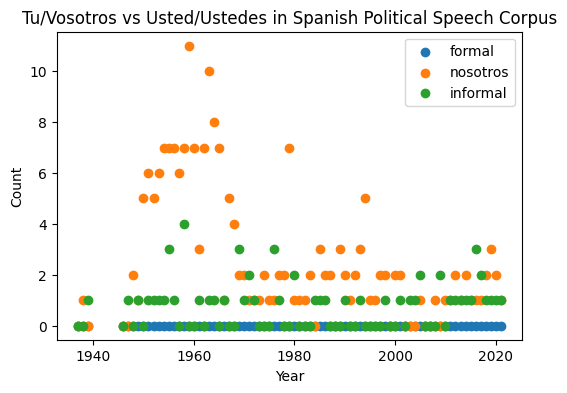

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# df = pd.read_csv("./spanish_counts.csv")
fig,ax=plt.subplots(figsize=(6, 4))
# ax.scatter(x=df.year, y=df.vosotros_count, label='vosotros')
# ax.scatter(x=df.year, y=df.tu_count, label='tu')
ax.scatter(x=df.year, y=df.usted_count + df.ustedes_count, label='formal')
# ax.scatter(x=df.year,  y=df.ustedes_count, label='ustedes')
ax.scatter(x=df.year, y=df.nosotros_count, label='nosotros')

ax.scatter(x=df.year, y=df.vosotros_count + df.tu_count, label='informal')


plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Count")

ax.set_title('Formal vs Informal vs Neutral 1pl. in Spanish Political Speech Corpus')
plt.show()